# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how='left', sort=False)

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [63]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [64]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.sort_index()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study[mouse_study['Mouse ID'] != 'g989']
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice in the clean DataFrame.
clean_study['Mouse ID'].nunique()

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = clean_study.groupby(by = "Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_median = clean_study.groupby(by = "Drug Regimen")['Tumor Volume (mm3)'].median()
tumor_variance = clean_study.groupby(by = "Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_std = clean_study.groupby(by = "Drug Regimen")['Tumor Volume (mm3)'].std()
tumor_sem = clean_study.groupby(by = "Drug Regimen")['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_study.groupby(by = "Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

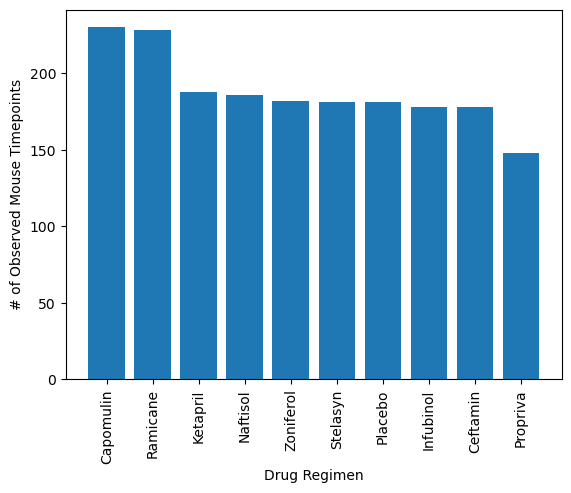

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_study["Drug Regimen"].value_counts()
regimen_counts = regimen_counts.sort_values(ascending=False)
plt.bar(regimen_counts.index, regimen_counts, color='tab:blue')
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


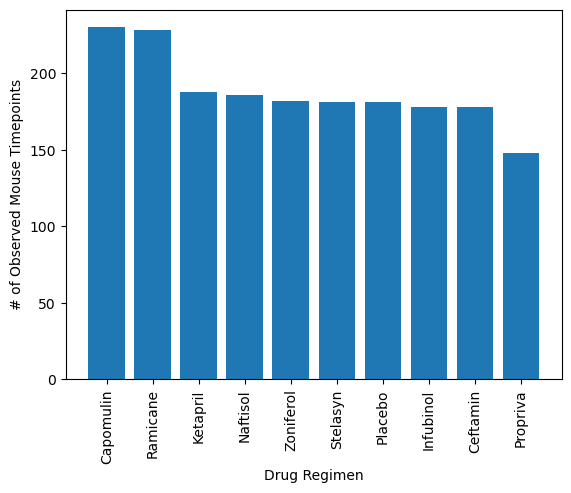

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_counts))
plt.bar(x_axis, regimen_counts, color='tab:blue', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

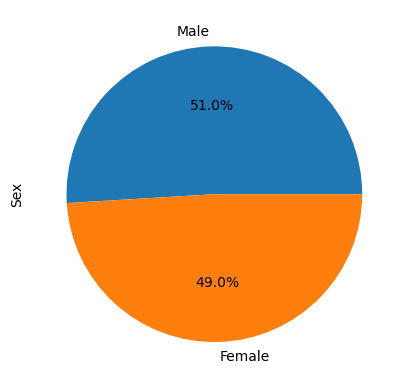

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_study['Sex'].value_counts()
labels = ["Male", "Female"]

plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

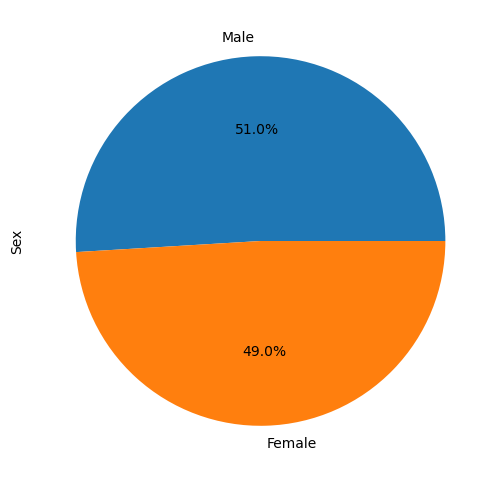

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.figure(figsize =(9, 6))
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_study.groupby(['Mouse ID'])['Timepoint'].max()
last_tp = last_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_group_df = last_tp.merge(clean_study, on = ["Mouse ID", "Timepoint"], how = "left")
merge_group_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merge_group_df.loc[merge_group_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    potential_outliers[drug] = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    tumor_vol.append(drug_data)
for drug in treatments:
    print(f"{drug}'s potential outliers: {potential_outliers[drug]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


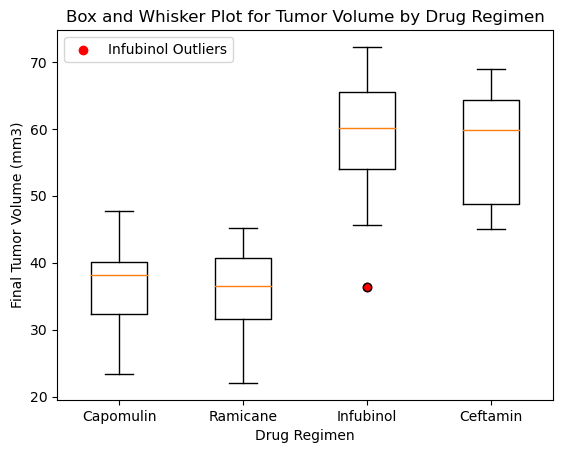

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatments, showfliers = True)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Box and Whisker Plot for Tumor Volume by Drug Regimen")

# Flag potential outliers
for drug, outliers in potential_outliers.items():
    if not outliers.empty:
        plt.scatter([treatments.index(drug) + 1] * len(outliers), outliers, color='red', label=f'{drug} Outliers')

plt.legend()
plt.show()

## Line and Scatter Plots

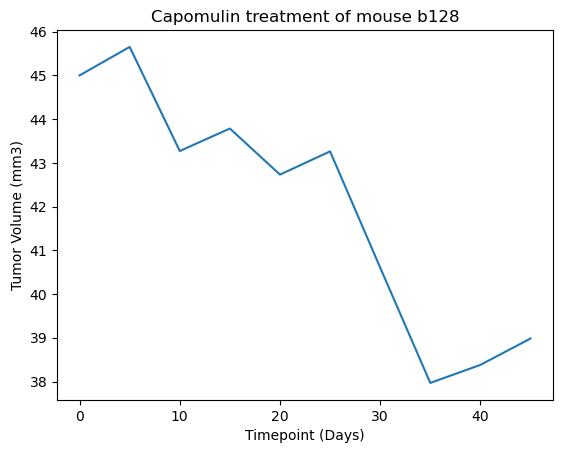

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'
mouse_data = clean_study[clean_study["Mouse ID"] == mouse_id]
x_axis = mouse_data['Timepoint']
y_axis = mouse_data['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()

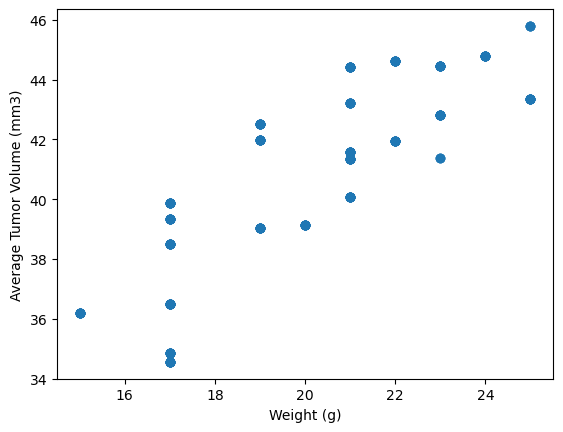

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_study[clean_study['Drug Regimen'] == 'Capomulin']
avg_tumor = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_avg_tumor = pd.merge(capomulin, avg_tumor, on='Mouse ID')
capomulin_avg_tumor = capomulin_avg_tumor.rename(columns={'Tumor Volume (mm3)_y': 'Average Tumor Volume'})
x_axis = capomulin_avg_tumor['Weight (g)']
y_axis = capomulin_avg_tumor['Average Tumor Volume']
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


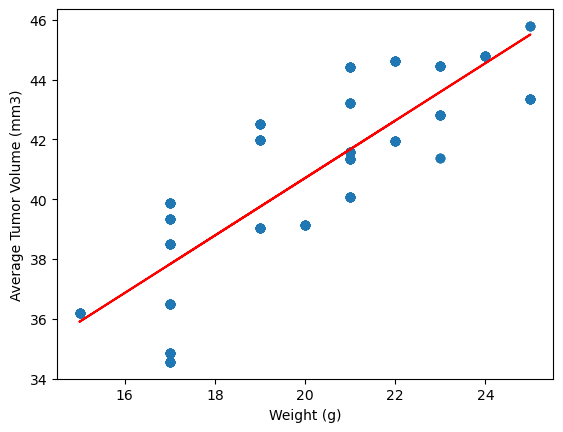

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Average Tumor Volume'])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

x_axis = capomulin_avg_tumor['Weight (g)']
y_axis = capomulin_avg_tumor['Average Tumor Volume']
plt.scatter(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()